## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline

### Reading in the data

In [2]:
df = pd.read_csv('Data/features_30_sec.csv')

#### Taking a look at the data

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


#### Looking at the info of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

#### Looking at some descriptive statistics

In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


### Pie Chart Showing the Genres in the Dataset

In [6]:
labels = pd.value_counts(df['label'].values, sort=True)
legend = df.label.unique()

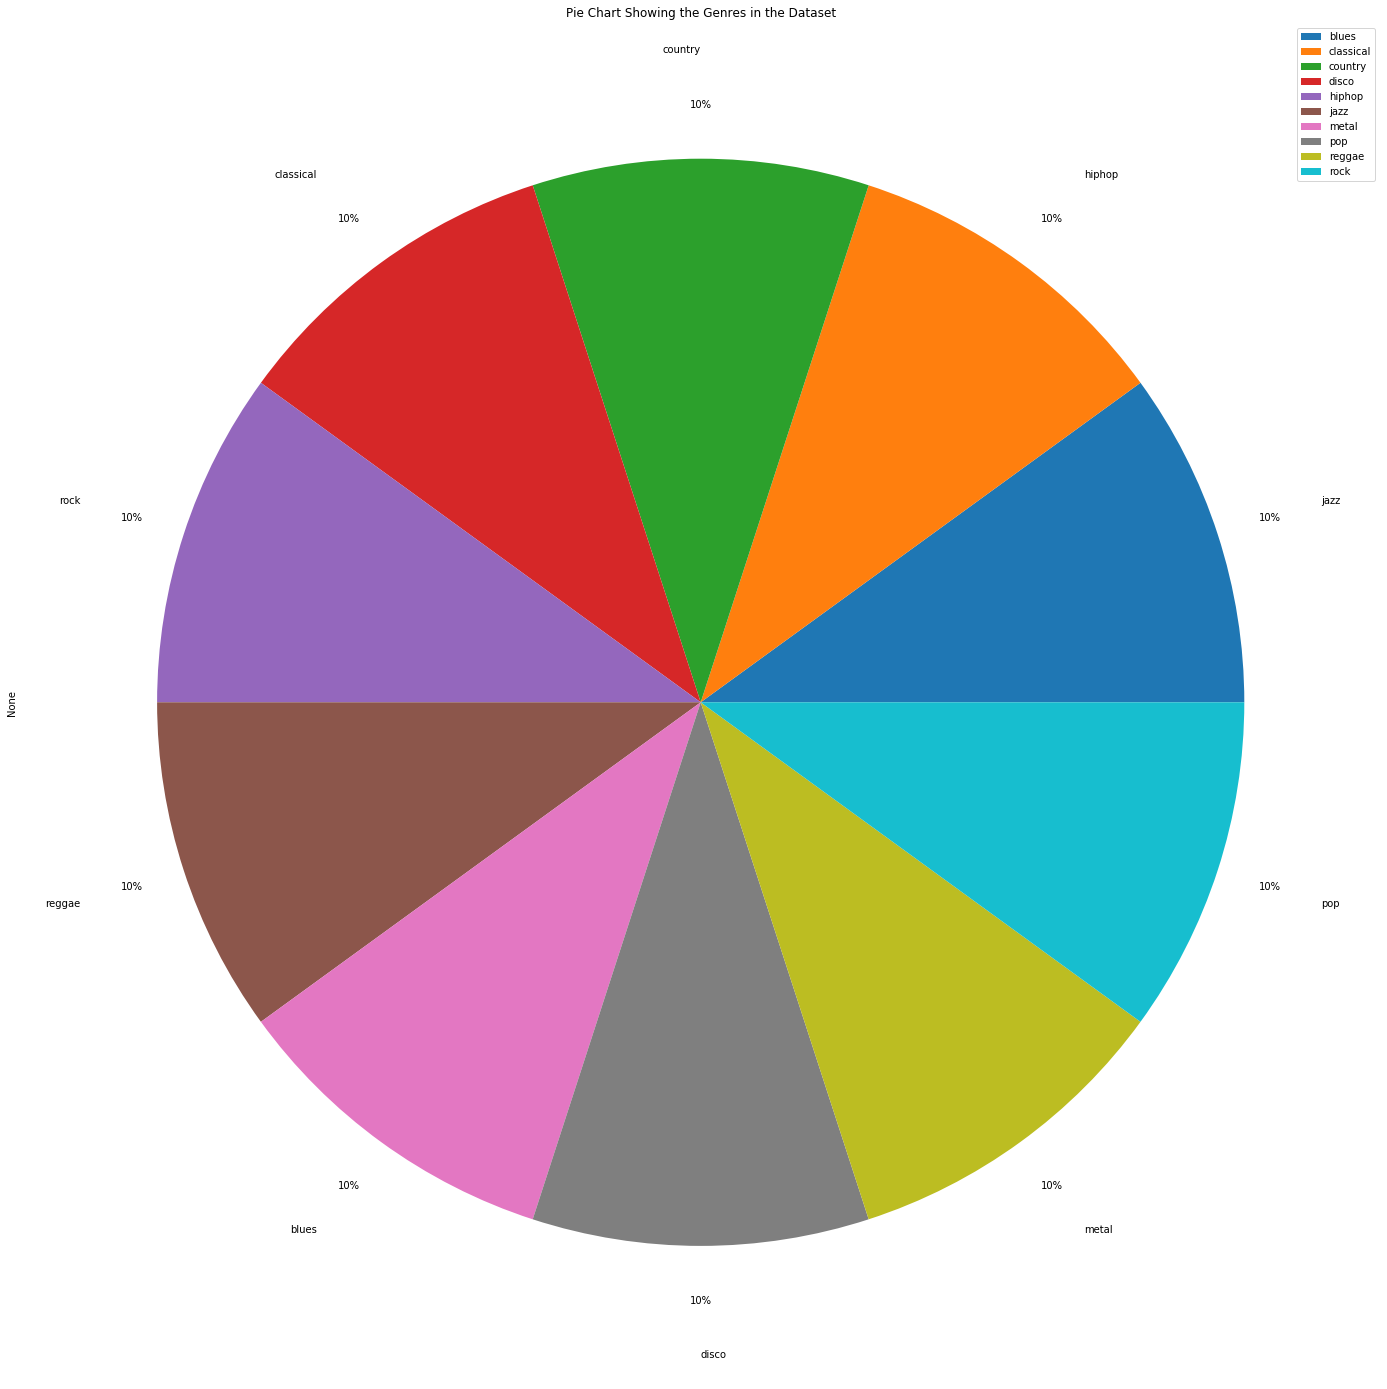

In [7]:
plt.figure(figsize=(45,25))
labels.plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend(legend, loc="best")
plt.title('Pie Chart Showing the Genres in the Dataset', fontdict=None, pad=None)
plt.savefig("Data/GenresPieChart.jpg")

### Plot Waveplot Function takes in a genre as an argument and plots the wave form for the first song in the genre class

In [8]:
def plot_waveplot(genre):
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'D:/Data/genres_original/{genre}/{genre}.00000.wav')

    # Computing and Plotting the waveplot
    plt.figure(figsize=(10,7))
    plt.title('{}.00000.wav'.format(genre))
    librosa.display.waveplot(y, sr=sr)
    plt.show()

### Plot Waveplot for Blues

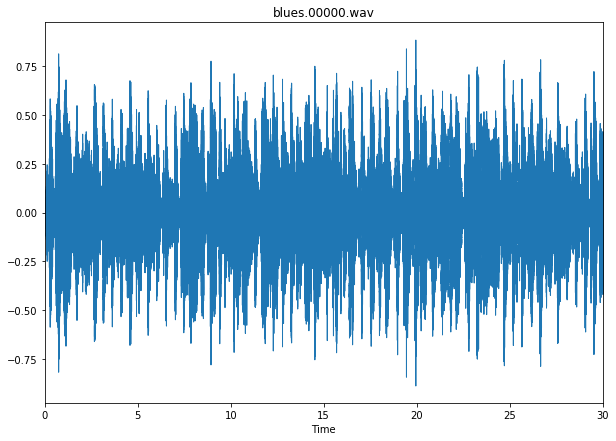

In [9]:
plot_waveplot('blues')

### Plot Waveplot for Classical

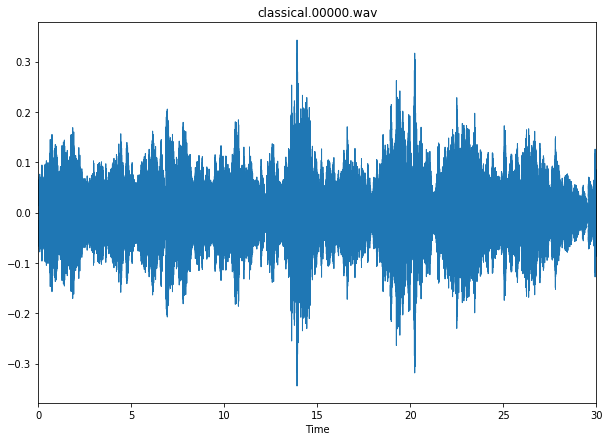

In [10]:
plot_waveplot('classical')

### Plot Waveplot for Country

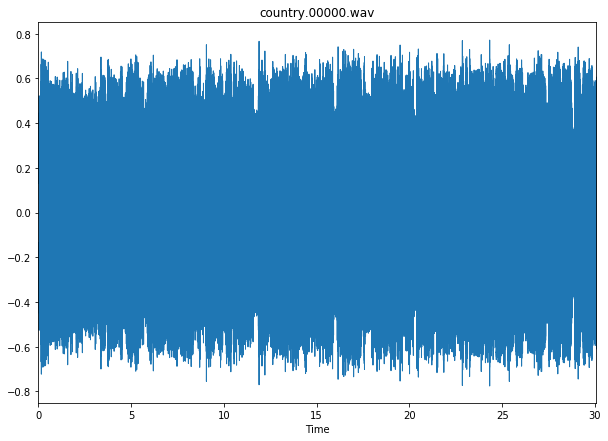

In [11]:
plot_waveplot('country')

### Plot Waveplot for Disco

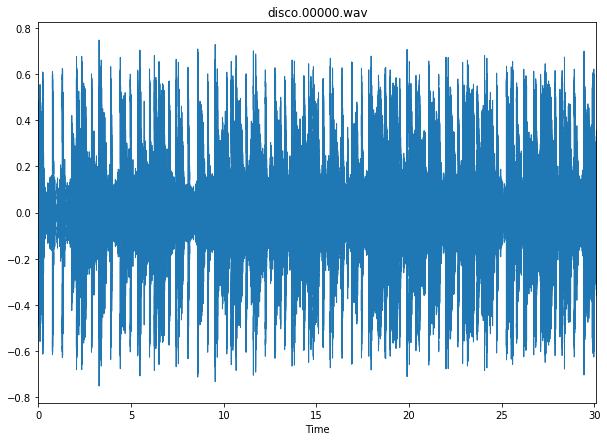

In [12]:
plot_waveplot('disco')

### Plot Waveplot for Hip Hop

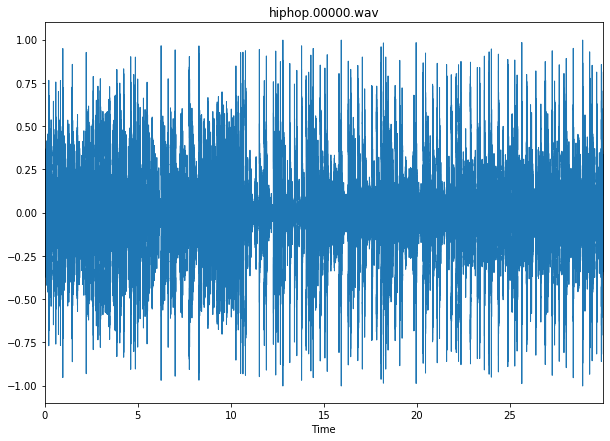

In [13]:
plot_waveplot('hiphop')

### Plot Waveplot for Jazz

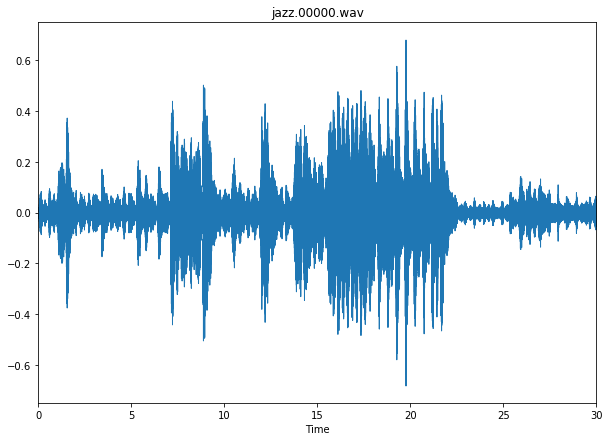

In [14]:
plot_waveplot('jazz')

### Plot Waveplot for Metal

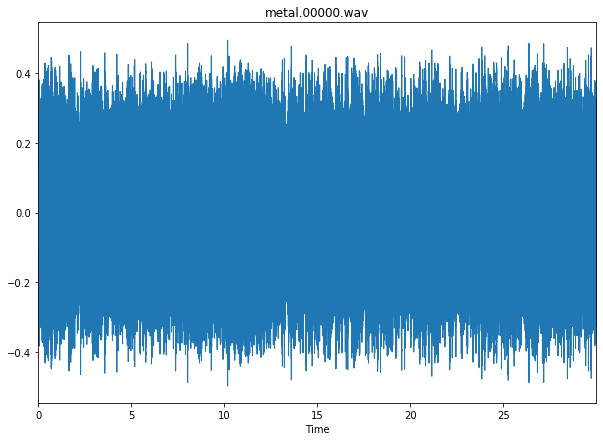

In [15]:
plot_waveplot('metal')

### Plot Waveplot for Pop

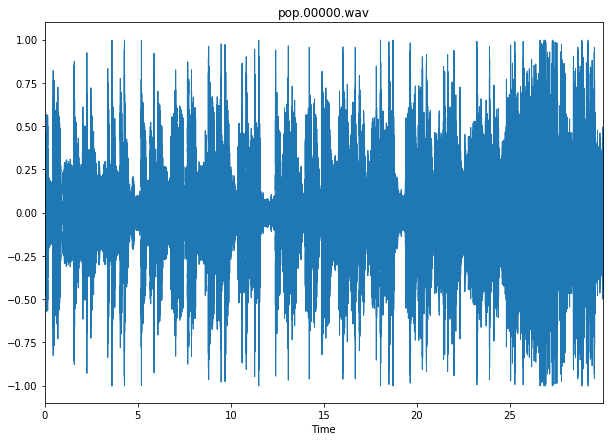

In [16]:
plot_waveplot('pop')

### Plot Waveplot for Reggae

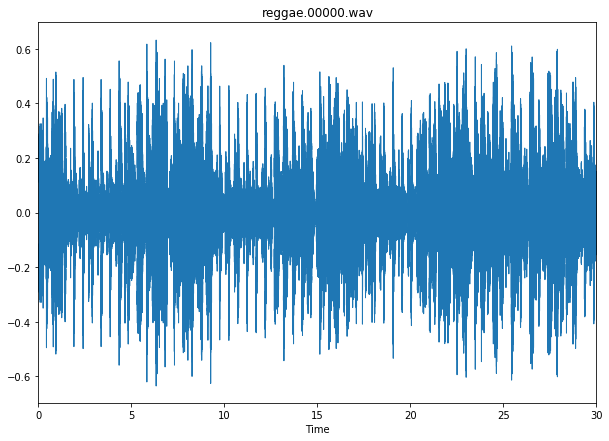

In [17]:
plot_waveplot('reggae')

### Plot Waveplot for Rock

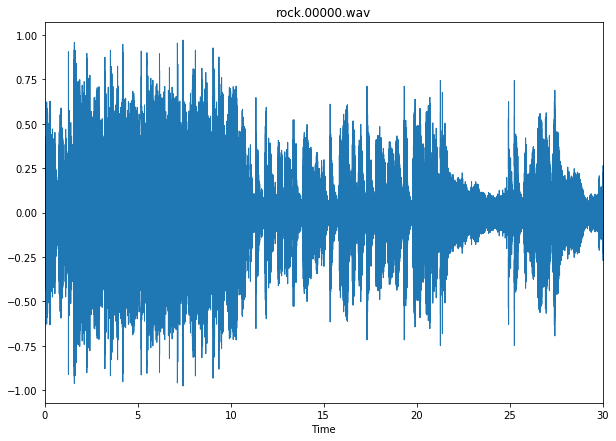

In [18]:
plot_waveplot('rock')

### Plot Spectrogram Function takes in a genre as an argument and plots the mel spectrogram for the first song in the genre class

In [19]:
def plot_spectrogram(genre):
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'D:/Data/genres_original/{genre}/{genre}.00000.wav')

    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('{}.00000.wav'.format(genre))
    plt.show()

#### Spectrogram for Blues Genre

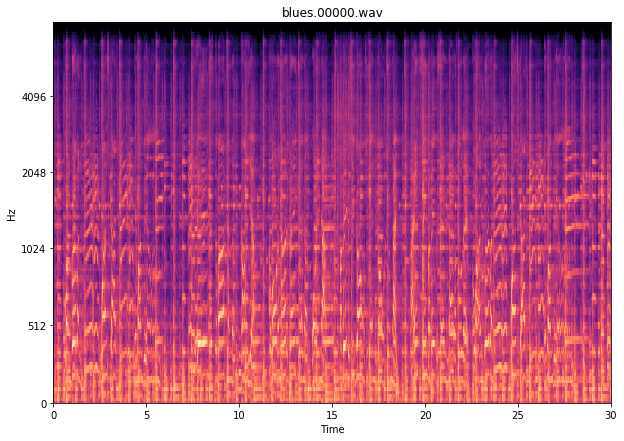

In [20]:
plot_spectrogram('blues')

#### Spectrogram for Classical Genre

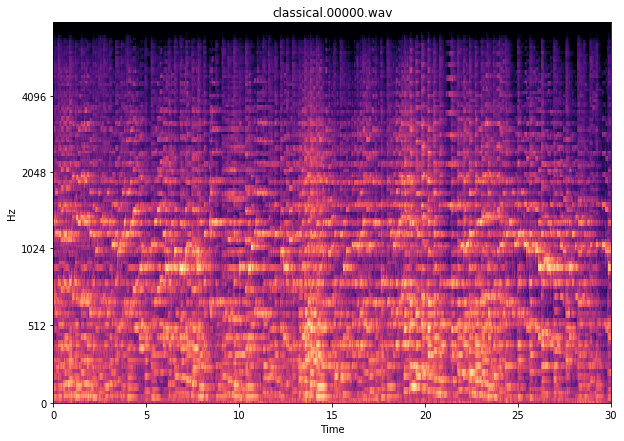

In [21]:
plot_spectrogram('classical')

#### Spectrogram for Country Genre

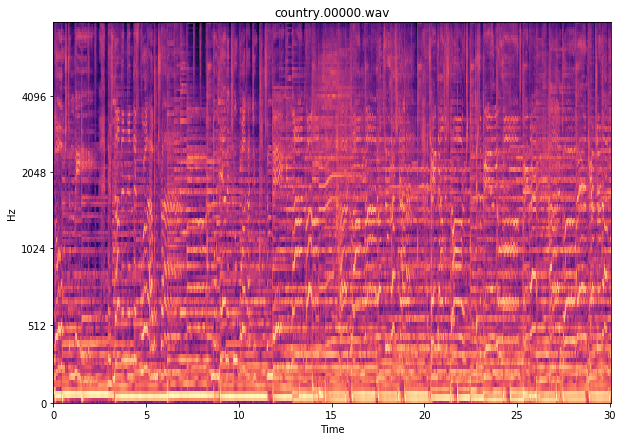

In [22]:
plot_spectrogram('country')

#### Spectrogram for Disco Genre

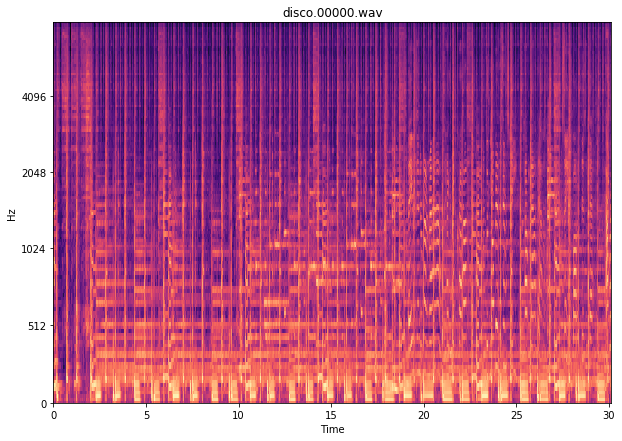

In [23]:
plot_spectrogram('disco')

#### Spectrogram for Hiphop Genre

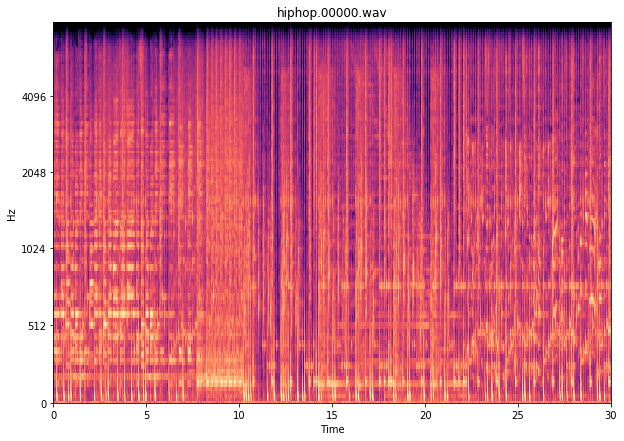

In [24]:
plot_spectrogram('hiphop')

#### Spectrogram for Jazz Genre

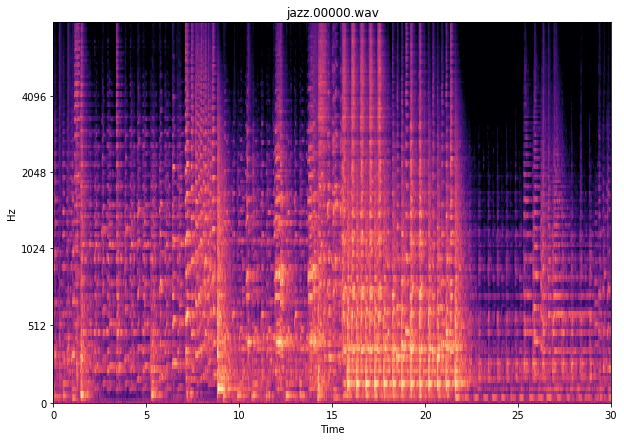

In [25]:
plot_spectrogram('jazz')

#### Spectrogram for Metal Genre

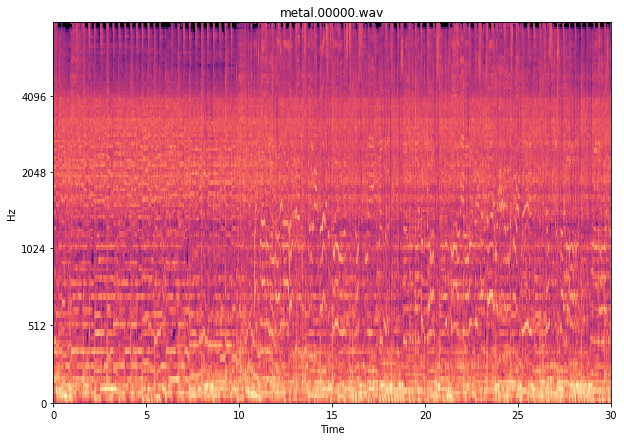

In [26]:
plot_spectrogram('metal')

#### Spectrogram for Pop Genre

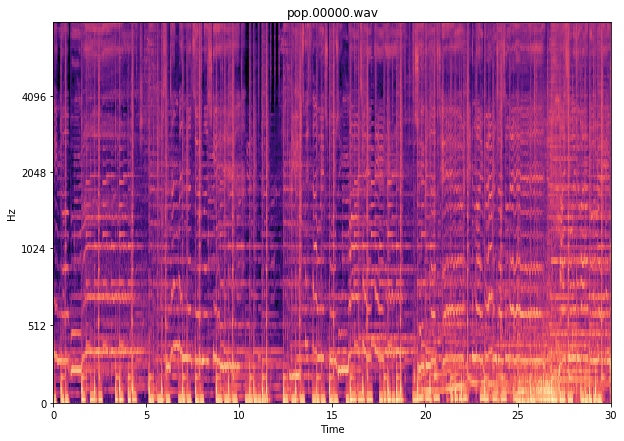

In [27]:
plot_spectrogram('pop')

#### Spectrogram for Reggae Genre

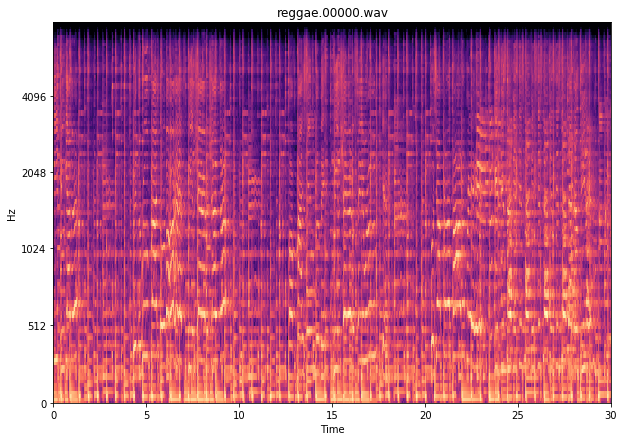

In [28]:
plot_spectrogram('reggae')

#### Spectrogram for Rock Genre

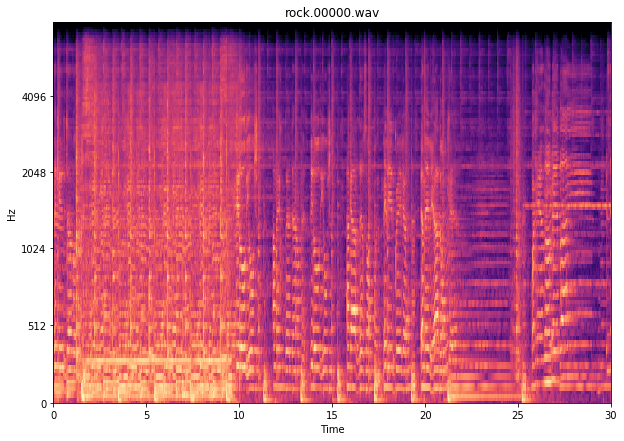

In [29]:
plot_spectrogram('rock')

### Correlation Heatmap

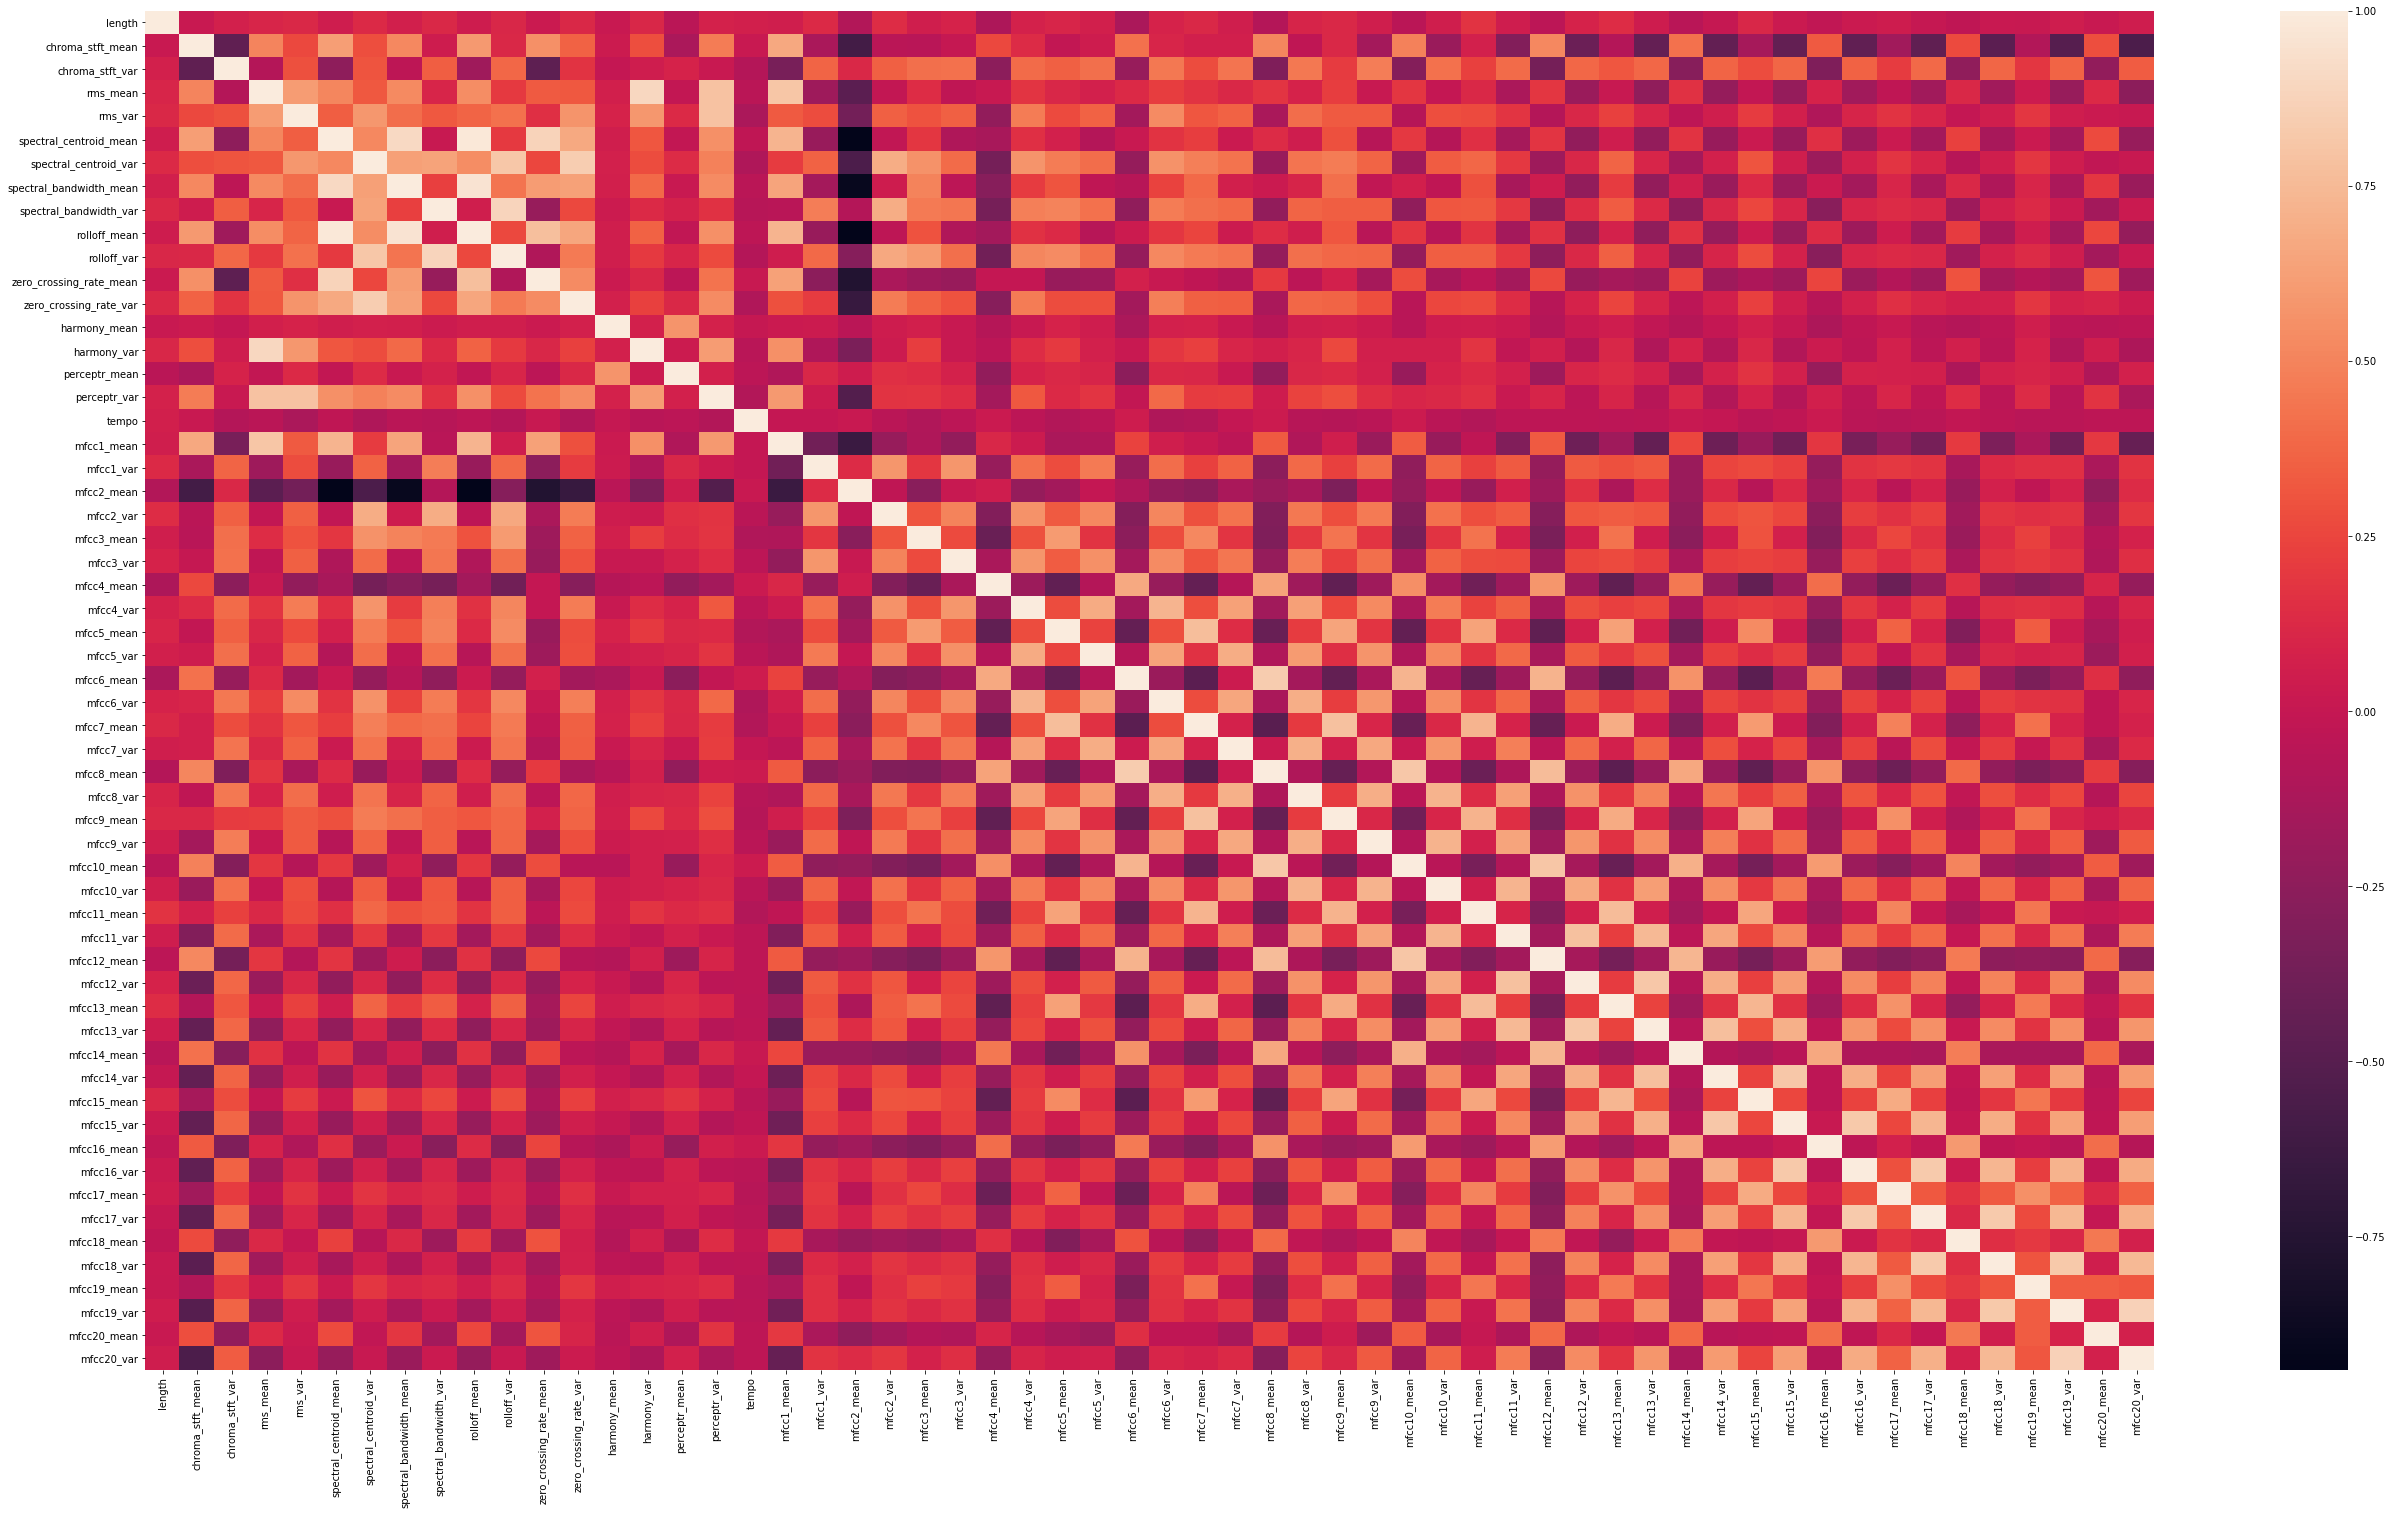

In [30]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(45,25))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.savefig("Data/Correlation Heatmap.jpg")

#### Selecting the Mean Attributes.

In [31]:
mean_columns = df[["length","chroma_stft_mean","rms_mean","spectral_centroid_mean","spectral_bandwidth_mean","rolloff_mean","zero_crossing_rate_mean",
                  "harmony_mean", "perceptr_mean", "tempo", "mfcc1_mean", "mfcc2_mean", "mfcc3_mean", "mfcc4_mean", "mfcc5_mean", "mfcc6_mean", "mfcc7_mean", "mfcc8_mean",
                  "mfcc9_mean", "mfcc10_mean", "mfcc11_mean", "mfcc12_mean", "mfcc13_mean", "mfcc14_mean", "mfcc15_mean", "mfcc16_mean", "mfcc17_mean", "mfcc18_mean",
                  "mfcc19_mean", "mfcc20_mean"]]

In [32]:
mean_df = mean_columns.copy()

### Mean Attributes Correlation Heatmap

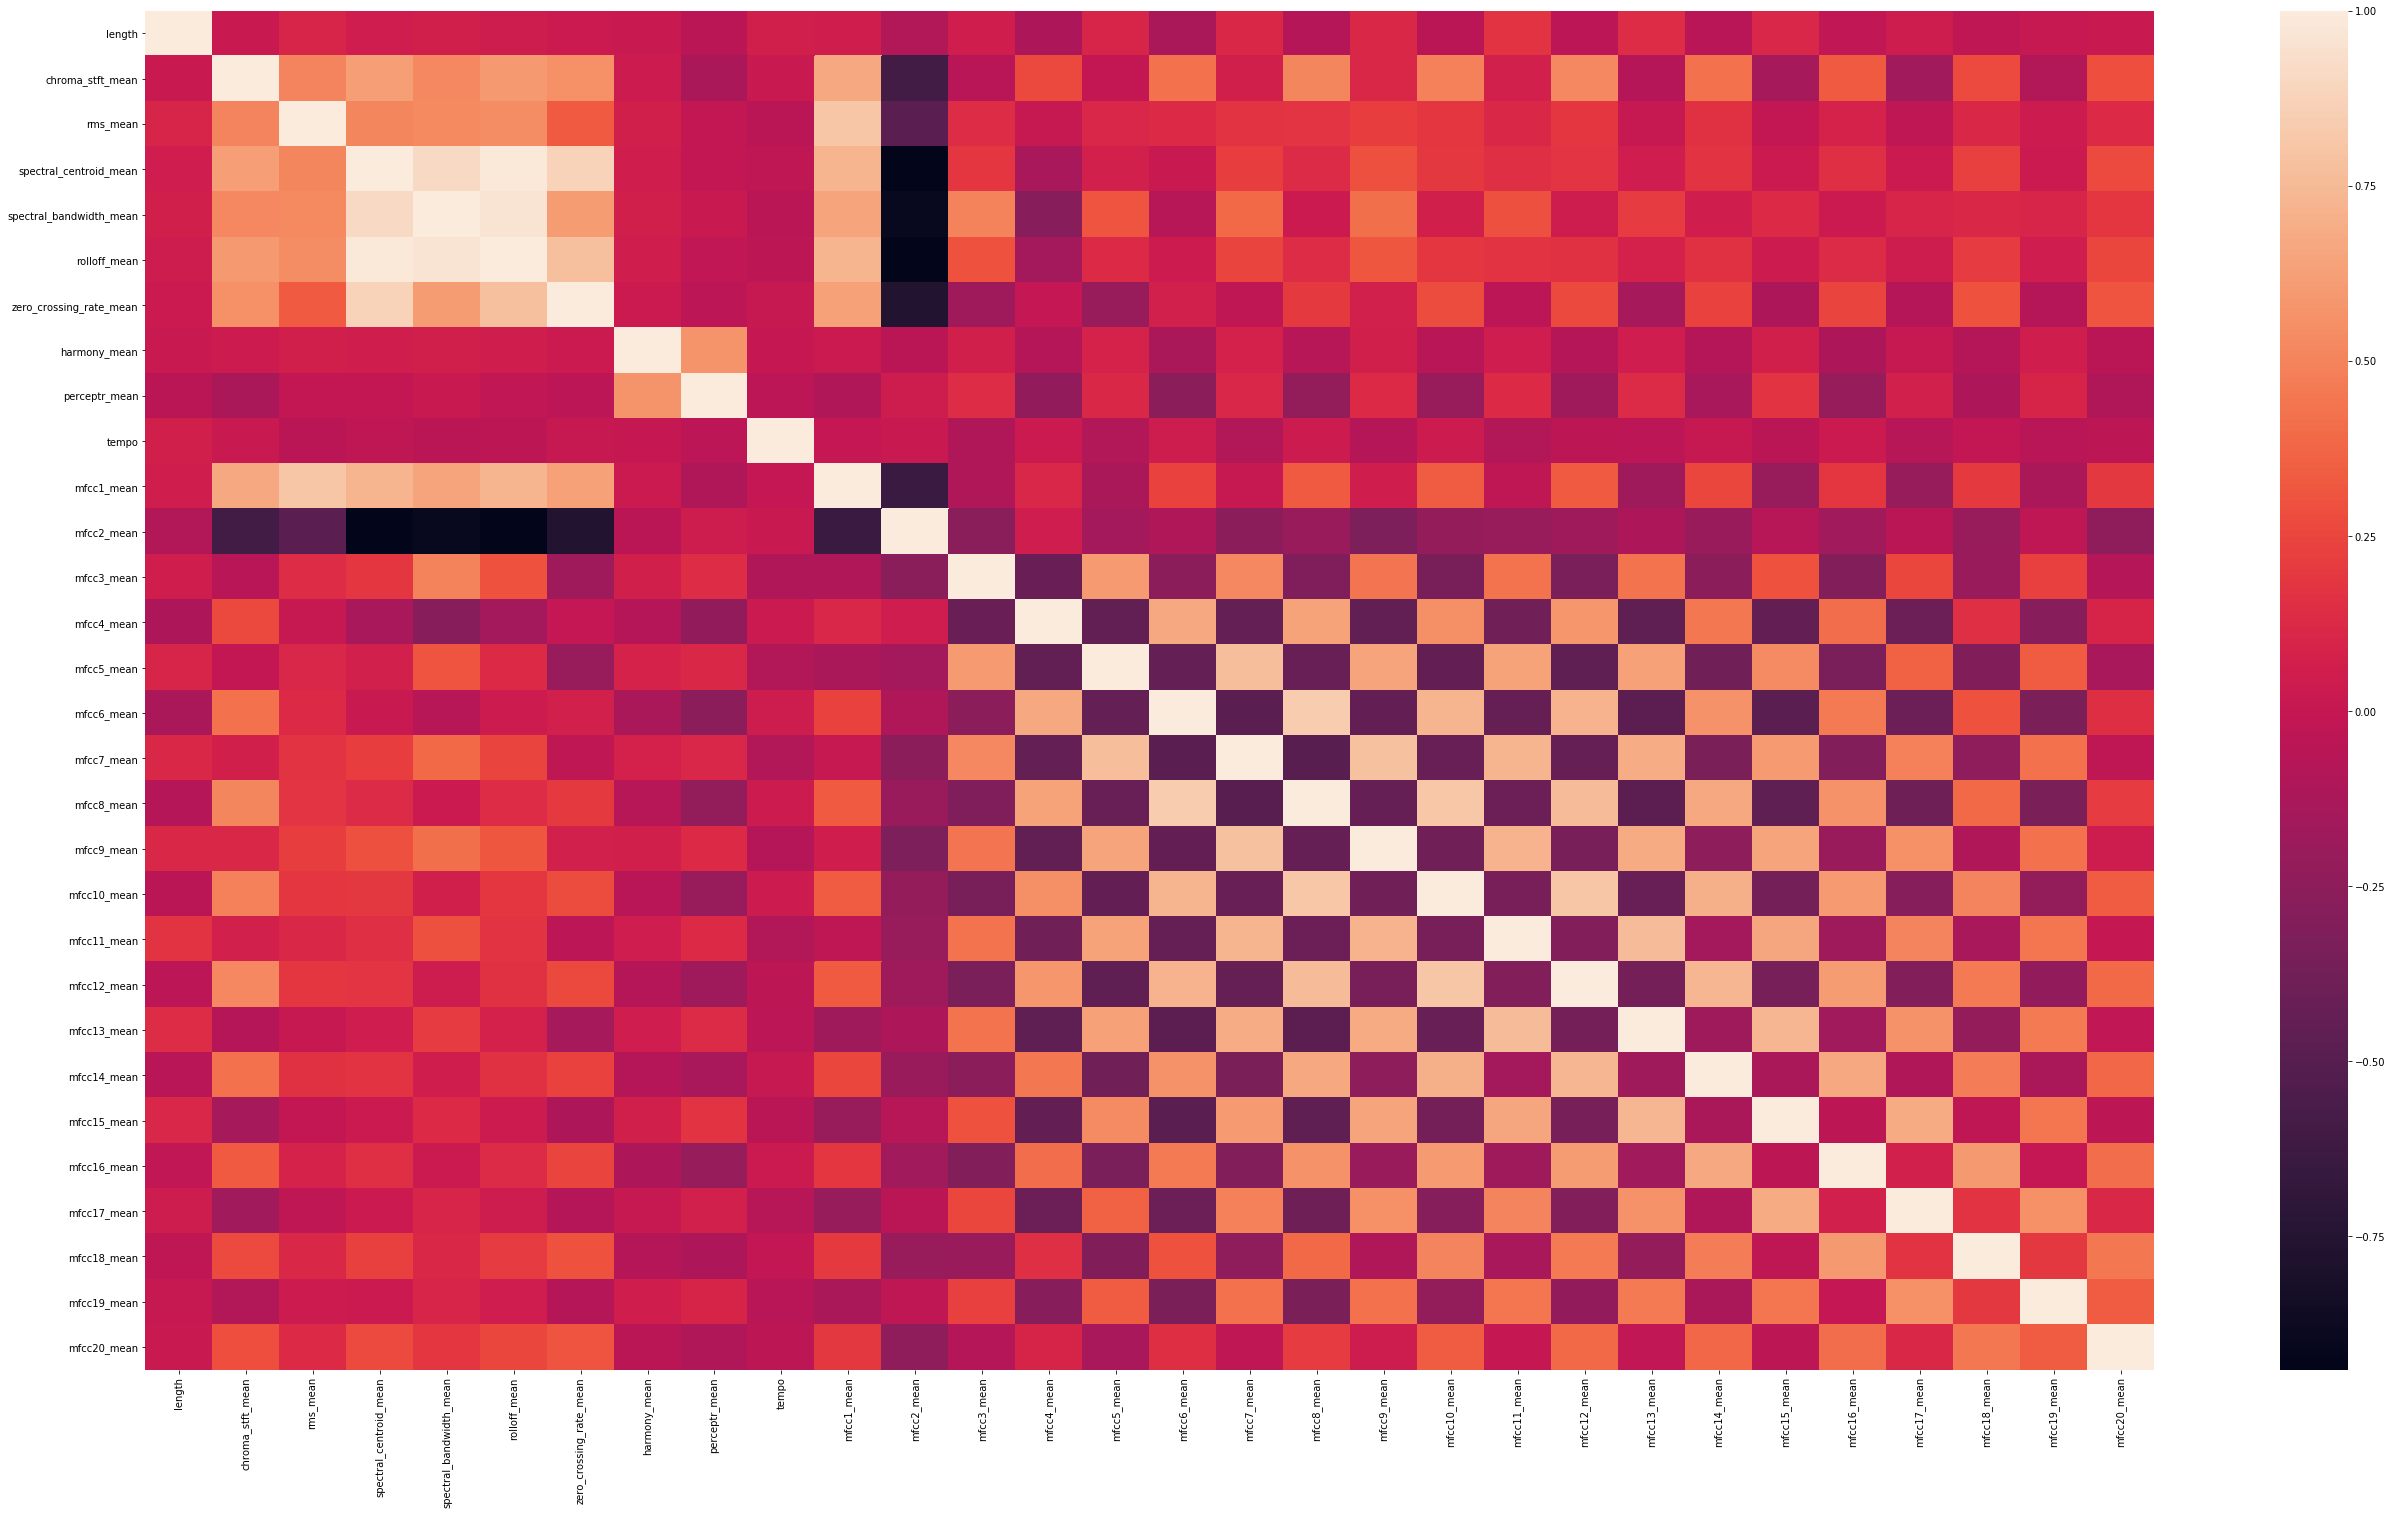

In [33]:
# calculate the correlation matrix
corr1 = mean_df.corr()

# plot the heatmap
plt.figure(figsize=(45,25))
sns.heatmap(corr1, 
        xticklabels=corr1.columns,
        yticklabels=corr1.columns)
plt.savefig("Data/Mean Attributes Correlation Heatmap.jpg")

#### Selecting the Variance Attributes

In [34]:
var_columns = df[["length","chroma_stft_var","rms_var","spectral_centroid_var","spectral_bandwidth_var","rolloff_var","zero_crossing_rate_var",
                  "harmony_var", "perceptr_var", "tempo", "mfcc1_var", "mfcc2_var", "mfcc3_var", "mfcc4_var", "mfcc5_var", "mfcc6_var", "mfcc7_var", "mfcc8_var",
                  "mfcc9_var", "mfcc10_var", "mfcc11_var", "mfcc12_var", "mfcc13_var", "mfcc14_var", "mfcc15_var", "mfcc16_var", "mfcc17_var", "mfcc18_var",
                  "mfcc19_var", "mfcc20_var"]]

In [35]:
var_df = var_columns.copy()

### Variance Attributes Correlation Heatmap

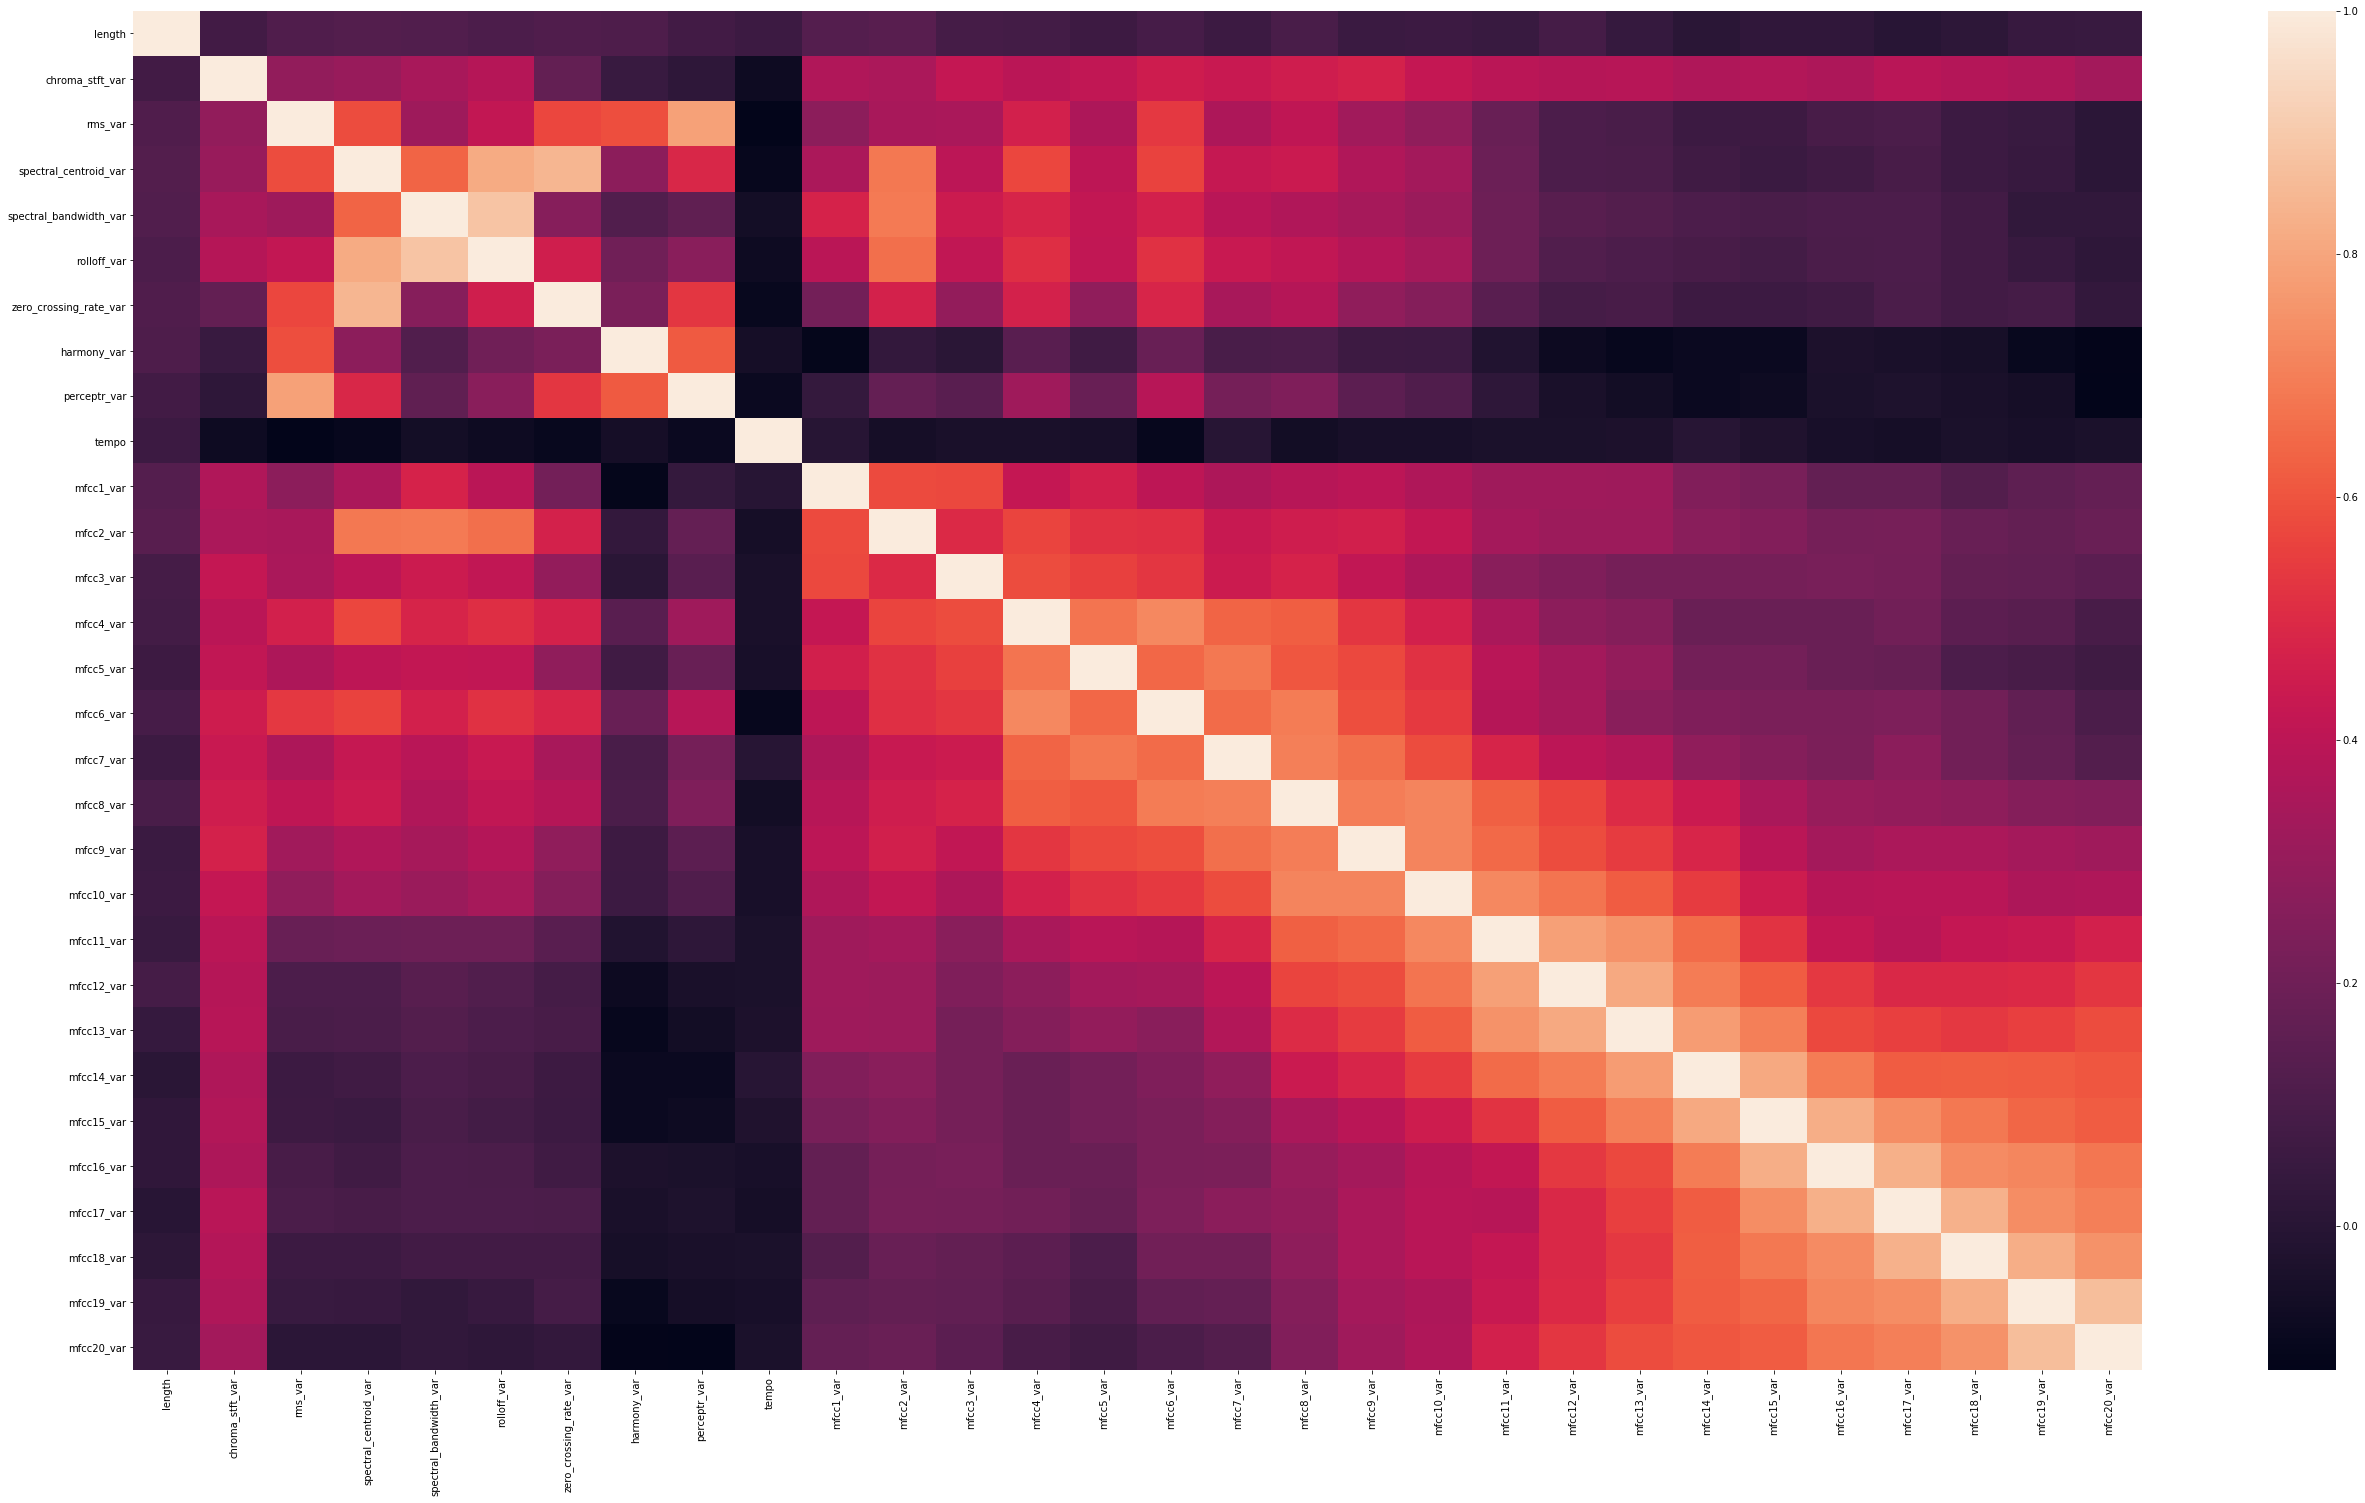

In [36]:
# calculate the correlation matrix
corr2 = var_df.corr()

# plot the heatmap
plt.figure(figsize=(45,25))
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns)
plt.savefig("Data/Variance Attributes Correlation Heatmap.jpg")

### Box and Whiskers Plot for Genre Distributions.

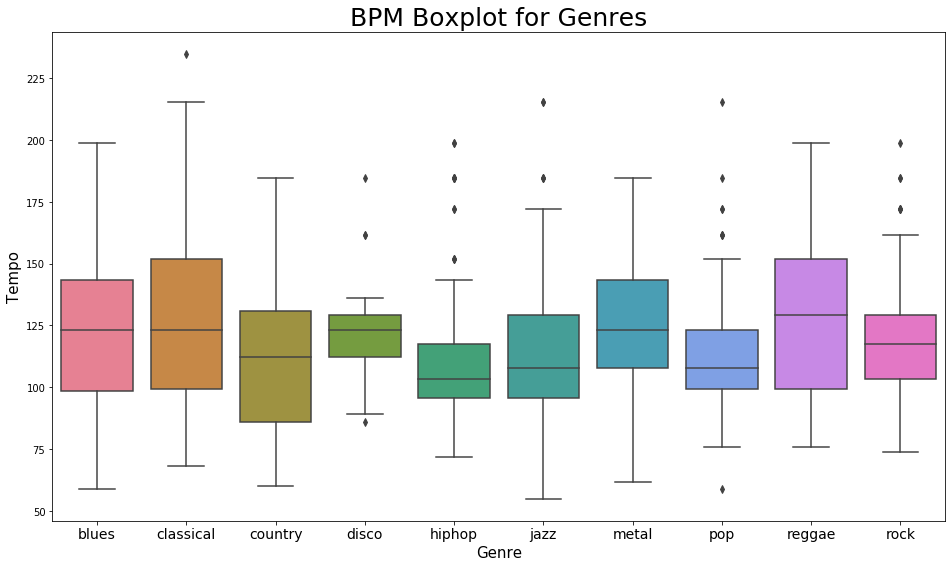

In [37]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Tempo", fontsize = 15)
plt.savefig("Data/Tempo Boxplot.jpg")

### generate_mel_spectrogram() function takes in the path containing the audio files and computes the mel spectrogram for each audio file, reshapes them so that they are all the same size, and stores them in a numpy array.

###  It also creates a list of genre labels and maps them to numeric values.

#### Returns:
    
####   X (array): array of mel spectrogram data from all audio files in the given directory
####   y (array): array of the corresponding genre labels in numeric form

In [38]:
def generate_mel_spectrogram(directory):
    
    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    
    
    # Looping through each file in the directory
    for file in os.scandir(directory):
        
        # Loading in the audio file
        y, sr = librosa.core.load(file)
        
        # Extracting the label and adding it to the list
        label = str(file).split('.')[0][11:]
        labels.append(label)
        
        # Computing the mel spectrograms
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Adjusting the size to be 128 x 660
        if spect.shape[1] != 660:
            spect.resize(128,660, refcheck=False)
            
        # Adding the mel spectrogram to the list
        mel_specs.append(spect)
        
    # Converting the list or arrays to an array
    X = np.array(mel_specs)
    
    # Converting labels to numeric values
    labels = pd.Series(labels)
    label_dictionary = {
        'blues': 0,
        'classical': 1,
        'country': 2,
        'disco': 3,
        'hiphop': 4,
        'jazz': 5,
        'metal': 6,
        'pop': 7,
        'reggae': 8,
        'rock': 9
    }
    y = labels.map(label_dictionary).values
    
    # Returning the mel spectrograms and labels
    return X, y

In [39]:
def generate_mel_spectrogram_binary(directory):
    
    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    
    
    # Looping through each file in the directory
    for file in os.scandir(directory):
        
        # Loading in the audio file
        y, sr = librosa.core.load(file)
        
        # Extracting the label and adding it to the list
        label = str(file).split('.')[0][11:]
        labels.append(label)
        
        # Computing the mel spectrograms
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Adjusting the size to be 128 x 660
        if spect.shape[1] != 660:
            spect.resize(128,660, refcheck=False)
            
        # Adding the mel spectrogram to the list
        mel_specs.append(spect)
        
    # Converting the list or arrays to an array
    X = np.array(mel_specs)
    
    # Converting labels to numeric values
    labels = pd.Series(labels)
    label_dictionary = {
        'blues': 0,
        'classical': 0,
        'country': 1,
        'disco': 1,
        'hiphop': 1,
        'jazz': 0,
        'metal': 1,
        'pop': 1,
        'reggae': 1,
        'rock': 1
    }
    y = labels.map(label_dictionary).values
    
    # Returning the mel spectrograms and labels
    return X, y

### Using the function to extract mel spectrograms from the directory containing the GTZAN Genre Dataset audio files

In [40]:
X, y = generate_mel_spectrogram('D:/genres_original')

In [41]:
B_X, B_y = generate_mel_spectrogram_binary('D:/genres_original')

### Save Numpy NdArray to Local Machine

In [42]:
from numpy import save

save('Data/mel_specs.npy', X)

In [43]:
from numpy import save

save('Data/labels.npy', y)

In [44]:
from numpy import save

save('Data/b_mel_specs.npy', B_X)

In [45]:
from numpy import save

save('Data/b_labels.npy', B_y)